In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
import zipfile
from google.colab import drive

#uploading the datasets as files in Google colab
drive.mount('/content/drive/')
!unzip -q "/content/drive/My Drive/Colab Notebooks/Fast_AI/test_set_TSimp.zip" #test_set
!unzip -q "/content/drive/My Drive/Colab Notebooks/Fast_AI/training_val_set_TSimp.zip" #training_val_set

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [5]:
#names of the images in previous form
path_img="/content/training_val_set"
fnames = get_image_files(path_img)
fnames[:20]

[PosixPath('/content/training_val_set/principal_skinner_pic_0854.jpg'),
 PosixPath('/content/training_val_set/moe_szyslak_pic_0868.jpg'),
 PosixPath('/content/training_val_set/homer_simpson_pic_0318.jpg'),
 PosixPath('/content/training_val_set/professor_john_frink_pic_0030.jpg'),
 PosixPath('/content/training_val_set/homer_simpson_pic_1744.jpg'),
 PosixPath('/content/training_val_set/lenny_leonard_pic_0244.jpg'),
 PosixPath('/content/training_val_set/ned_flanders_pic_1032.jpg'),
 PosixPath('/content/training_val_set/mayor_quimby_pic_0149.jpg'),
 PosixPath('/content/training_val_set/kent_brockman_pic_0143.jpg'),
 PosixPath('/content/training_val_set/edna_krabappel_pic_0268.jpg'),
 PosixPath('/content/training_val_set/moe_szyslak_pic_1451.jpg'),
 PosixPath('/content/training_val_set/abraham_grampa_simpson_pic_0608.jpg'),
 PosixPath('/content/training_val_set/krusty_the_clown_pic_0112.jpg'),
 PosixPath('/content/training_val_set/apu_nahasapeemapetilon_pic_0428.jpg'),
 PosixPath('/content/

In [0]:
#extracting the labels from the name using regexp 
np.random.seed(100)
bs = 64
pat = r'/([^/]+)_pic_\d+.jpg$'
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

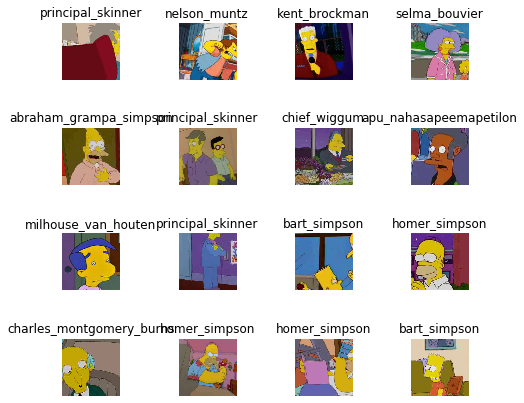

In [7]:
data.show_batch(rows=4, figsize=(7,6))

In [8]:
print(data.classes)
len(data.classes)

['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson', 'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby', 'milhouse_van_houten', 'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner', 'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum', 'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird', 'troy_mcclure', 'waylon_smithers']


42

In [9]:
#training
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [10]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.489581,0.734612,0.196847,03:42
1,0.764603,0.430950,0.114907,03:46
2,0.540096,0.343753,0.095079,03:52
3,0.445538,0.322052,0.086718,03:47


In [0]:
learn.save('model1')
